# Food Trends over Time
By Luke Hong, Hershy Kulkarni, Bill Liu

DS 2001 - Professor Nelson

Dataset: https://www.kaggle.com/GoogleNewsLab/food-searches-on-google-since-2004

## Project Motivation:

**Purpose:** To educate and understand food trends over time to determine if humans are getting healthier over time or not.

**Hypothesis:** We believe society has become **more** health-conscious over time and is shifting towards healthier foods.

**Research Question:** *What do Google search trends of different types of foods reflect about people’s health consciousness over time?*


## Summary of Results:

*   Data analysis illustrates interesting but unconclusive insights about the healthiness of diet over time. Our hypothesis is unable to be accepted or rejected.



## Ethical Implications:

Our data and subsequent analysis are mostly benign and sourced from Google search history. However, there are still several potential issues due to the nature of the data we are utilizing. 

One possible oversight is that, due to this dataset's source from Google searches, the trend we calculate and visualize will not include countries and regions that **don't** utilize Google as part of their search engine or even have **access** to the internet. This rules out many areas in developing and third-world countries and even entire countries like China. Therefore, the conclusion we draw wouldn't accurately represent the food choices of humans as a whole.

Another complication might arise because, though Google might have included statements mentioning themselves or other developers as users of collected search data, many users may have **never read** the user agreement. It means that we are very likely using metadata which the majority of the users didn't know or give us the right to access. In this specific research, we are conducting very generalized analysis and the dataset is anonymized and summarized. Nevertheless, It doesn't excuse the possible infringement of privacy and should be taken into consideration as we proceed with our research.

Despite these risks, *the potential upside is significant*. By using this dataset, we can further understand what the consumer choices are through the lens of our searching behaviors. Ultimately, for this reason, we think the use of this dataset has more upside than downside.

## Data:

First, let's understand the data we're working with.

In [1]:
import math
import statistics
import random
from sklearn import linear_model
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('alldata.csv', 'r') as f:
  header = f.readline().strip().split(',')
  data = [line.strip().split(',')for line in f] #generating list of lists
  
  food_dict = {}
  
  for sublist in data: #deleting arbitrary Google code
    del(sublist[1])
    date = int(sublist[1][0:4] + sublist[1][5:])
    if date not in food_dict:
      food_dict[date] = {}
    food_dict[date][sublist[0]] = int(sublist[2]) #initalizing dictionary by date
  
  del(header[1]) #clean header
  
  print(len(food_dict[200401])) # of instances
  print(data[:2])
  print(food_dict)


189
[['frozen-yogurt', '2004-01', '20'], ['frozen-yogurt', '2004-02', '16']]
{200401: {'frozen-yogurt': 20, 'ice-cream': 6, 'pie': 6, 'marshmallow': 5, 'nougat': 25, 'meringue': 8, 'chocolate': 31, 'chocolate-mousse': 25, 'marzipan': 11, 'donut': 15, 'diet': 56, 'baked-chicken': 23, 'hot-dog': 17, 'chili': 45, 'chili-con-carne': 37, 'spaghetti': 31, 'salad': 21, 'apple-pie': 3, 'cornbread': 6, 'pot-pie': 20, 'stew': 34, 'banana-bread': 30, 'bread': 49, 'lasagna': 23, 'chocolate-chip-cookies': 17, 'dumpling': 31, 'tamale': 13, 'ravioli': 25, 'beef-steak': 44, 'meatball': 14, 'soup': 44, 'meatloaf': 31, 'potato-gratin': 8, 'chocolate-cake': 36, 'pork': 36, 'beef': 42, 'pork-chops': 27, 'nachos': 14, 'barbecue-sauce': 16, 'baked-beans': 7, 'pasta-salad': 6, 'hamburger': 18, 'kohlrabi': 22, 'swiss-chard': 14, 'beet': 13, 'okra': 20, 'eggplant': 21, 'garden-tomato': 24, 'cherry-tomato': 9, 'maitake': 40, 'sweet-potato': 2, 'brussel-sprouts': 2, 'parsnip': 16, 'celeriac': 23, 'broccoli': 16,

As the code illustrates, there are 189 foods in this dataset. The headers are relatively unimportant for our analysis. **food_dict** is the primary dictionary for our project, with each week of each year corresponding to the number of searches by food in that week.

This is an example of how the dataset looks. Each food has search trends over time. This is just one of the foods, **frozen yogurt**.

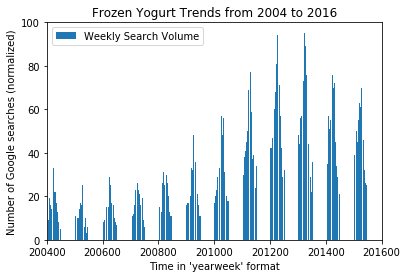

In [3]:
froyo = []
for sublist in data:
  if sublist[0] == 'frozen-yogurt':
    froyo.append(int(sublist[2]))
plt.bar(food_dict.keys(), froyo, label = 'Weekly Search Volume')
plt.title("Frozen Yogurt Trends from 2004 to 2016")
plt.xlabel("Time in 'yearweek' format")
plt.ylabel("Number of Google searches (normalized)")
plt.axis([200401, 201601, 0, 100])
plt.legend()

Looks like search trends spiked between 2012 and 2013 and, overall, have increased. Interesting!

## Methods:

This is the general framework for our project:

- What foods have become favored over time? Top movers and shakers of food trends over time (using regression coefficient to figure out steepest change); monthly adjusted (plotting same months over the years)
- Clean the data
- Do linear regressions based on monthly searches over the years for **each** month
- Average out regressions (by coefficients) to figure out average growth rate for food
- Compare each food’s coefficients (absolute value) to find the most prominent changes
- Analyze results

Without further ado...let's begin.


## Analysis:



The first thing we have to do is come up with a list of all the weeks and years in this dataset, in order to do many of the following steps (visualizations, regressions).

In [4]:
weekrange = range(0,52) #the number of weeks in the year starting from 0
yearrange = range(1,13) #the number of years in the data set starting from 1
begin_week = 200401 #the first date of the data set
yearsperweek = [] #empty list to edit with

for i in weekrange: #loop through week range to generate a list with sublists of all the same week in different years, can be used for seasonal adjustments in the future
  temp = [] #empty sublist to be attached
  week = begin_week + i #the first year of a specific week 
  temp.append(week) #add it to temp list
  for a in yearrange: 
    w = week + a*100 #change the years
    temp.append(w) #add to the temp list
  yearsperweek.append(temp)
print(yearsperweek[:10])

[[200401, 200501, 200601, 200701, 200801, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601], [200402, 200502, 200602, 200702, 200802, 200902, 201002, 201102, 201202, 201302, 201402, 201502, 201602], [200403, 200503, 200603, 200703, 200803, 200903, 201003, 201103, 201203, 201303, 201403, 201503, 201603], [200404, 200504, 200604, 200704, 200804, 200904, 201004, 201104, 201204, 201304, 201404, 201504, 201604], [200405, 200505, 200605, 200705, 200805, 200905, 201005, 201105, 201205, 201305, 201405, 201505, 201605], [200406, 200506, 200606, 200706, 200806, 200906, 201006, 201106, 201206, 201306, 201406, 201506, 201606], [200407, 200507, 200607, 200707, 200807, 200907, 201007, 201107, 201207, 201307, 201407, 201507, 201607], [200408, 200508, 200608, 200708, 200808, 200908, 201008, 201108, 201208, 201308, 201408, 201508, 201608], [200409, 200509, 200609, 200709, 200809, 200909, 201009, 201109, 201209, 201309, 201409, 201509, 201609], [200410, 200510, 200610, 200710, 200810, 2009

Next, we need to find the searches for each food per week over the years. Below is a function to implement this and an example of *frozen yogurt searches for week 1 from 2004 to 2016*.

In [5]:
def findvalues(sublist): #use sublist of years and weeks to find all the values within that timeframe
  allthevalues = [food_dict[element] for element in sublist]
  food_dict_week = {}
  for dictionary in allthevalues: # each dictionary is its respective  week for each year in the data set starting from week 1
    for food in dictionary:
      if food in food_dict_week:
        food_dict_week[food].append([dictionary[food]])
      if food not in food_dict_week:
        food_dict_week[food] = [[dictionary[food]]]
  return food_dict_week #number of searches by item for week "0" (week 1) for each year in dataset

print(findvalues(yearsperweek[0])['frozen-yogurt']) #just an example of search volume 

[[20], [5], [12], [10], [14], [16], [17], [35], [40], [45], [36], [31], [30]]


In order to make a regression, we have to make lists into list-of-lists. 

In [6]:
array_list = [] #turning yearsperweek into regression-friendly format
for element in yearsperweek:
  temp = [[year] for year in element]
  array_list.append(temp)

print(array_list[51])

[[200452], [200552], [200652], [200752], [200852], [200952], [201052], [201152], [201252], [201352], [201452], [201552], [201652]]


Next, we need to find the average slope for the line of the best fit for the food by looking at a per-week basis. Below is an example of finding a linear regression for frozen yogurt by averaging slope on a weekly basis. As you can see, the average coefficient for frozen yogurt is **3.74**.

3.7381656804733714

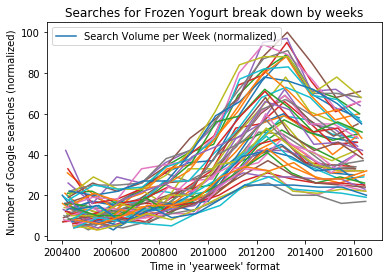

In [7]:
temporary = []
for i in range(len(array_list)): #how to find linear regression coefficients per week 
  plt.plot(array_list[i], (findvalues(yearsperweek[i])['frozen-yogurt']))
  plt.title("Searches for Frozen Yogurt break down by weeks")
  regr = linear_model.LinearRegression()
  regr.fit(array_list[i], (findvalues(yearsperweek[i])['frozen-yogurt']))
  temporary.append(regr.coef_[0][0]*100) #multiplied by 100 because array_list increments by 100, not 1; used [0][0] to get rid of regression-friendly array format
  plt.legend(['Search Volume per Week (normalized)'])
  plt.xlabel("Time in 'yearweek' format")
  plt.ylabel("Number of Google searches (normalized)")
statistics.mean(temporary)

Pretty interesting graph. Clearly, frozen yogurt seems to be very popular around 2013, regardless of the week. Let's see if we can do more interesting analysis, though.

We made a list of all the foods in the dataset to assist in future steps.

In [8]:
name_list = list(food_dict[200401].keys()) #list of all food names in the data set
print(name_list)
print(len(name_list))

['frozen-yogurt', 'ice-cream', 'pie', 'marshmallow', 'nougat', 'meringue', 'chocolate', 'chocolate-mousse', 'marzipan', 'donut', 'diet', 'baked-chicken', 'hot-dog', 'chili', 'chili-con-carne', 'spaghetti', 'salad', 'apple-pie', 'cornbread', 'pot-pie', 'stew', 'banana-bread', 'bread', 'lasagna', 'chocolate-chip-cookies', 'dumpling', 'tamale', 'ravioli', 'beef-steak', 'meatball', 'soup', 'meatloaf', 'potato-gratin', 'chocolate-cake', 'pork', 'beef', 'pork-chops', 'nachos', 'barbecue-sauce', 'baked-beans', 'pasta-salad', 'hamburger', 'kohlrabi', 'swiss-chard', 'beet', 'okra', 'eggplant', 'garden-tomato', 'cherry-tomato', 'maitake', 'sweet-potato', 'brussel-sprouts', 'parsnip', 'celeriac', 'broccoli', 'leek', 'mushroom', 'garlic', 'carrot', 'shallot', 'spinach', 'potato', 'chinese-water-chestnut', 'cauliflower', 'endive', 'onion', 'cabbage', 'asparagus', 'napa-cabbage', 'rhubarb', 'chinese-cabbage', 'radish', 'avocado', 'daiquiri', 'tom-collins', 'mojito', 'caipirinha', 'mai-tai', 'pina-co

Next, let's make a function to get the average coefficient of a food with the parameter being the name of a food. The function returns a dictionary of average coefficients for foods. 

First, we need to clean the data. As you can see in the raw dataset, there's gaps in the data. Let's clean that out first.

In [9]:
def clean_data(name): #removing foods without complete data
  truth = True
  for element in food_dict.keys():
    if name not in food_dict[element]:
      return False
  return True

In [10]:
def get_coe(name, dictionary): #a function to get the coeffecient of the linear regression of searches and add it to a dictionary
  temporary = []
  coe = 0
  for i in range(len(array_list)): #how to find linear regression coefficients per week 
    regr = linear_model.LinearRegression()
    if clean_data(name) == True: #data set is not clean and there are several ones that do not have continous data, skip
      regr.fit(array_list[i], (findvalues(yearsperweek[i])[name]))
      temporary.append(regr.coef_[0][0]*100) #multiplied by 100 because array_list increments by 100, not 1; used [0][0] to get rid of regression-friendly array format
      coe = statistics.mean(temporary)
      dictionary[name] = coe
    else:
      continue
  return dictionary

get_coe('frozen-yogurt', {})

{'frozen-yogurt': 3.7381656804733714}

Cool! This checks out with our manual calculation above. Clearly, this automated version of calculating coefficients works. Now, let's do it for **every** food, not just frozen yogurt.

Let's use this function for all the foods in the dataset.

In [11]:
coe_dict = {}
for a in name_list:
  get_coe(a, coe_dict)
print(len(coe_dict))

185


Great, it just computed average coefficients for 185 foods. This means there were 4 foods with incomplete data. Instead of getting errors for 4 foods, we just chose to skip them.

Below is the top 5 "largest growing" foods, middle 5 "largest growing" foods, and bottom 5 "largest growing" foods in the dataset with their respective coefficients. 

In [12]:
list_mid = []
list_top = sorted(coe_dict.values())[-5:]
for element in coe_dict.values():
  if -0.3 < element < 0.3:
      list_mid.append(element)
list_mid = sorted(list_mid)
list_bottom = sorted(coe_dict.values())[:5]

def find_names(l): # finds the corresponding names for each value of regression in a list
  name_list = [] 
  for i in range(len(l)): 
    for k,v in coe_dict.items():
      if v == l[i]:
        name_list.append(k)
  return name_list


print(find_names(list_top))
print(find_names(list_mid))
print(find_names(list_bottom))

['beet', 'kale', 'quinoa', 'macaron', 'chia']
['marzipan', 'quince', 'easter-egg', 'anise', 'turkey']
['chokecherry', 'onion', 'cosmopolitan', 'martini', 'gooseberry']


Interesting. Looks like the fastest growing search trends were for:

- beet
- kale
- quinoa
- macaron
- chia

That's neat.

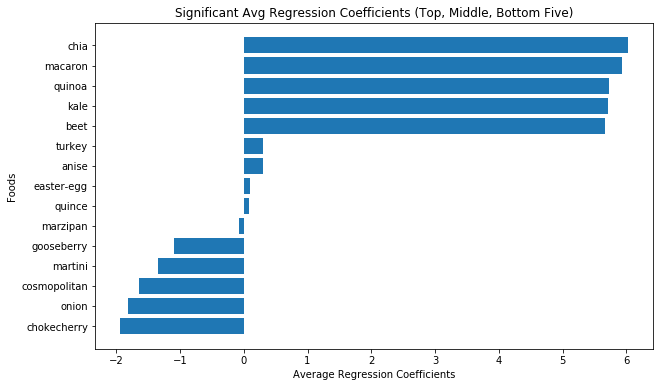

In [13]:
name_list = find_names(list_bottom) + find_names(list_mid) + find_names(list_top) #combine the top, middle, bottom lists of names together
coe_list = list_bottom + list_mid + list_top #combine the top, middle, bottom lists of coefficients together
plt.barh(range(len(coe_list)), coe_list, label='Avg Regression Coefficient')
plt.yticks(range(len(name_list)), name_list)
plt.title("Significant Avg Regression Coefficients (Top, Middle, Bottom Five)")
plt.xlabel("Average Regression Coefficients")
plt.ylabel("Foods")
fig = plt.gcf()
fig.set_size_inches(10, 6)

This is a bar graph of the topmost changed foods in terms of google searches, in order from the most negatively changed, the least changed, and the most positively changed, in respect to the average linear regression coefficient.

From this graph, it can be observed that there is more growth in search trends than the decrease in search trends for foods. (The highest regression coefficient is closer to 6 while the lowest regression coefficient is closer to -2). It's an interesting observation that are interesting to further look into.

Let's plot the search trends for these specific foods to learn more about them and give them an "eyeball test". Here's a function to speed it up.

In [14]:
def get_graph(list):
  for element in find_names(list): #graphing top 5 growth foods with their median searches per year
    temporary = []
    all_data = []
    yearlyavg = []
    count = 0
    for sublist in data:
      if sublist[0] == element:
        all_data.append(int(sublist[2]))
        temporary.append(int(sublist[2]))
        count += 1
      if count == 52:
        yearlyavg.append(statistics.median(temporary))
        temporary = []
        count = 0
    plt.figure()
    plt.bar(food_dict.keys(), all_data, label='Search Volume (normalized)')
    plt.plot([200401,200501,200601,200701,200801,200901,201001,201101,201201,201301,201401,201501,201601], yearlyavg, c = 'red',  label='Yearly Search Median')
    plt.title("{} trends from 2004 to 2016".format(element))
    plt.xlabel("Time in 'yearweek' format")
    plt.ylabel("Number of Google searches")
    plt.axis([200401, 201601, 0, 100])
    plt.legend()

**Top 5 Movers**

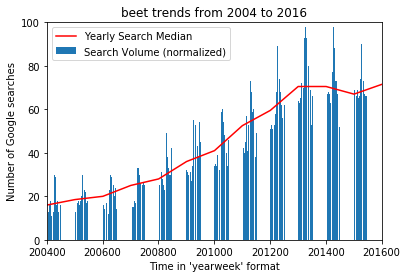

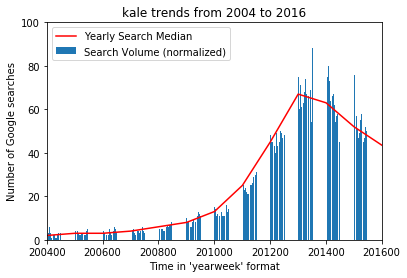

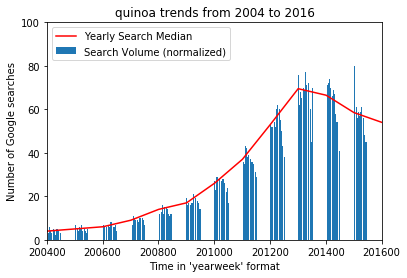

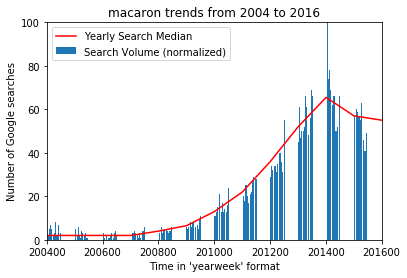

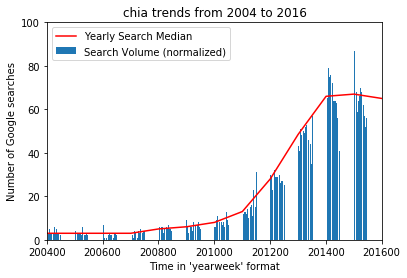

In [15]:
get_graph(list_top)

**Middle 5 Movers**

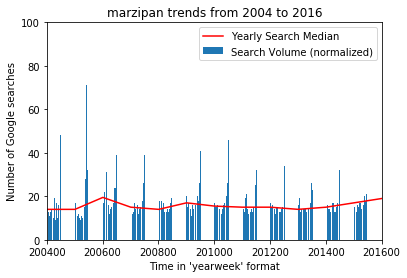

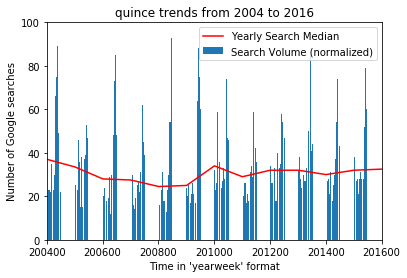

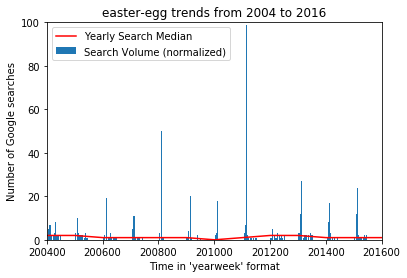

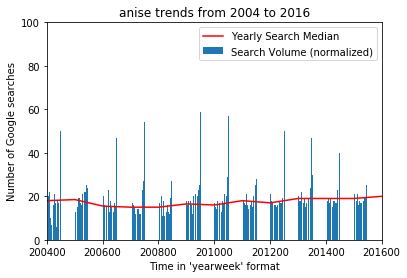

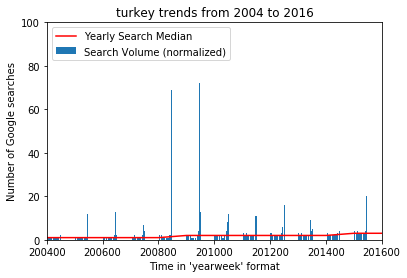

In [16]:
get_graph(list_mid)

**Bottom 5 Movers**

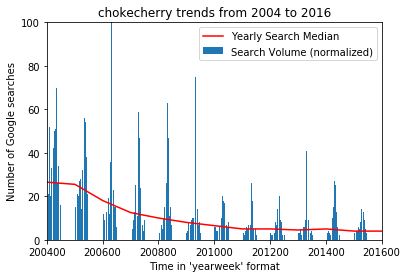

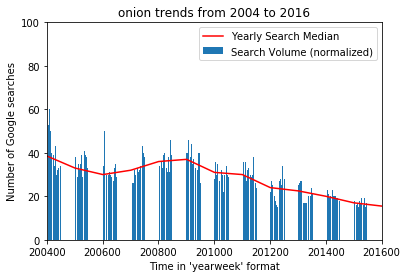

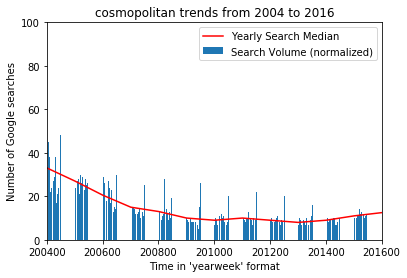

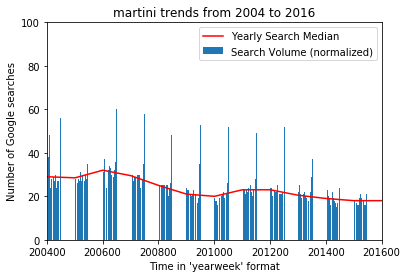

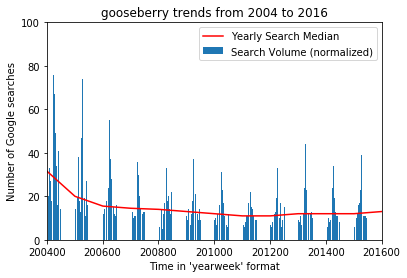

In [17]:
get_graph(list_bottom)

These check out. The top five movers definitely look like a positive trend, the middle five movers look relatively stagnant, and the bottom five movers have negative trends. That's good to see.

**We just did analysis of the most significant foods in the dataset. If you're curious about other specific foods, here's a chance to learn more about it!**

In [18]:
def maxmin(food): #this function gets the maximum search and the minimum search (normalized) and the week it happened in
  max_num = 0     
  min_num = 100   
  maxyear = 0
  maxweek = 0
  minyear = 0
  minweek = 0
  for i in range(52): #the range of weeks in the year
    temporary = findvalues(yearsperweek[i])[food]
    temp_list = [sublist[0] for sublist in temporary] #create a list that contains all the values of week 'i' across the year from 2004 to 2016
    for num in temp_list:
      if num > max_num:
        max_num = num
        maxweek = i + 1 #index starts with 0, +1 to get the true week #
        maxyear = 2004 + temp_list.index(num) #start year is 2004, adding the index number would get the year maximum search happened in
      if num < min_num:
        min_num = num
        minweek = i + 1
        minyear = 2004 + temp_list.index(num)

  return max_num, min_num, maxweek, maxyear, minweek, minyear

maxmin('coffee')

(100, 33, 51, 2011, 26, 2009)

In [19]:
def get_inf(food): #main output when running input statement
  graph_list = []
  coe = coe_dict[food.replace(' ','-')]
  graph_list.append(coe)
  print("The coefficient of {} searches regression (weekly adjusted) from 2004 to 2016 is {:.2f}".format(food,coe))
  print(("Most searches: week {} of {} \n"
        +"Least searches: week {} of {}").format(maxmin(food)[2],maxmin(food)[3],maxmin(food)[4],maxmin(food)[5]))
  return get_graph(graph_list)

In [22]:
def rand_inf(): #if input not recognized, return a random food in the dataset
  random.seed()
  a = random.randint(0,len(coe_dict)-1)
  rand_food = list(coe_dict.keys())[a]
  coe = coe_dict[rand_food]
  print("We couldn't find the food you were looking for in the dataset... >_< \nHere is a random food instead!")
  return get_inf(rand_food)

### Search For Your Food Here!

---


What is the food you would like to search for?(All lowercase, space between word) yo
We couldn't find the food you were looking for in the dataset... >_< 
Here is a random food instead!
The coefficient of negroni searches regression (weekly adjusted) from 2004 to 2016 is 1.99
Most searches: week 23 of 2016 
Least searches: week 30 of 2008


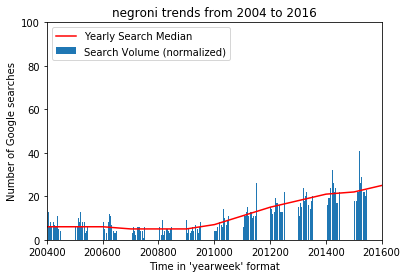

In [23]:
food = input("What is the food you would like to search for?(All lowercase, space between word) ")
if food in coe_dict:
  get_inf(food)
else:
  rand_inf()

## Discussion & Conclusion:

Our findings illustrate some interesting conclusions:



---

- When analyzing the top five positive trending foods (beet, kale, quinoa, macaron, chia), we notice a mostly healthy sample of foods. Except for macaron, these are objectively healthy foods. Macaron's presence indicates some level of inaccuracy, where *positive search trends may have reflected broader food 'fads' and not actual demand for that food.*

- The middle five foods are the ones that move the least in either direction. These foods are all highly **cyclical/seasonal**, for example, searches for turkey are the highest around Thanksgiving, and Easter egg is the highest around Easter. Therefore, the weekly adjustment for these food trends takes away the seasonal boosts and as a result, shows that they are relatively consistent throughout the years.

- The bottom five trending foods illustrate little to no correlation with health. These foods are more or less declining due to falling out of trend. In addition, these foods are also relative staples, like onions and alcoholic drinks, where demand is largely stable and consistent over time. Lowering search volume, then, would reflect a lack of interest in these items for this very reason. This further *supports our initial theory* that these searches may be fueled more by general interest instead of actual health consciousness and demand.

---
Synthesizing our data analysis with our initial question, with the following purpose, hypothesis, and research question, it's clear that **our hypothesis is unable to be concluded one way or another**. It's difficult to make an argument that people are getting *healthier* over time with this data. 

*Our original goals were*:

**Purpose:** To educate and understand food trends over time to determine if humans are getting healthier over time or not.

**Hypothesis:** We believe society has become **more** health-conscious over time and is shifting towards healthier foods.

**Research Question:** *What do Google search trends of different types of foods reflect about people’s health consciousness over time?*

---
There are some limitations to our project. By using search trends as a proxy for actual demand for foods, we made strong assumptions about their relationship. In hindsight, assuming search trends would tie with real demand closely may have been overstated.

*In the future, we would*:

- Use actual sales volume data instead of search data to come up with a better dataset for analysis.
- Use quadratic regression to find points of interest over the time of the dataset using derivatives. It's not difficult to find these points of interest given rather rudimentary methods, but it would be enhanced with more quantiative approaches.
